# Pymaceuticals Inc.
---

### Analysis

- In an intitial look at this data observed in a DataFrame, I've observed a few duplicate data points for the same mouse Id. Those duplicates were removed, as was that singular data point to ensure the data stays as clean and accurate as possible. Once compiling a statistical analysis for each drug regimen, I observed that Capomulin and Ramicane had the most significant decrease in tumor size from the begginning to the end of the study. This is also observed by taking into account the variance and standard deviation. The data seems to show a significant decrease in tumor size consistently in the mice that were given the Capomulin and Ramicane Drug Regimens. 
    Although, when comparing the time points in this data set, I have observed that both Capomulin and Ramicane had a similiar amount of time points tested, meaning the other regimens were not observed over as long of a period of time as the other two regimens. 
        When looking at the data for the other regimens, it seems that the regimens were significantly increased in total volume of the tumor. I would conclude then that it makes sense that the other regimens were not tested for as long as the most successful regimens. 
        Looking soley at Capomulin, I have observed a steady decrease in tumor size over the time that the mice were administered this regimen. It is also very clear that the weight of the mouse had a strong correlation with the tumor size by volume by the end of the study. Since the sex of the mice used in the study was nearly even, there is no significant difference shown in how the medications effecting the different sex. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "./data/Mouse_metadata.csv"
study_results_path = "./data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
scc_tumor_study_merged = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
scc_tumor_study_merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(scc_tumor_study_merged["Mouse ID"].unique())

249

In [9]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
search_duplicates = scc_tumor_study_merged.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicate_mouse = scc_tumor_study_merged.loc[search_duplicates, 'Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_data = scc_tumor_study_merged[scc_tumor_study_merged['Mouse ID'] == 'g989']
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = scc_tumor_study_merged[scc_tumor_study_merged['Mouse ID'].isin(duplicate_mouse)==False]
clean_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [20]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_data["Mouse ID"].unique())

248

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = clean_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdev = clean_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_mouse_data = pd.DataFrame({'Mean Tumor Volume': mean, 
                                   'Median Tumor Volume': median, 
                                   'Tumor Volume Variance': variance, 
                                   'Tumor Volume Std. Dev.': stdev, 
                                   'Tumor Volume Std. Err.': sem})

summary_mouse_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [33]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_mouse_data = clean_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg({'mean', 'median', 'var', 'std', 'sem'})

summary_mouse_data

,mean,std,median,sem,var
Drug Regimen,,,,,
Capomulin,40.675741,4.994774,41.557809,0.329346,24.947764
Ceftamin,52.591172,6.268188,51.776157,0.469821,39.290177
Infubinol,52.884795,6.567243,51.820584,0.492236,43.128684
Ketapril,55.235638,8.279709,53.698743,0.603860,68.553577
Naftisol,54.331565,8.134708,52.509285,0.596466,66.173479
Placebo,54.033581,7.821003,52.288934,0.581331,61.168083
Propriva,52.320930,6.622085,50.446266,0.544332,43.852013
Ramicane,40.216745,4.846308,40.673236,0.320955,23.486704
Stelasyn,54.233149,7.710419,52.431737,0.573111,59.450562


## Bar and Pie Charts

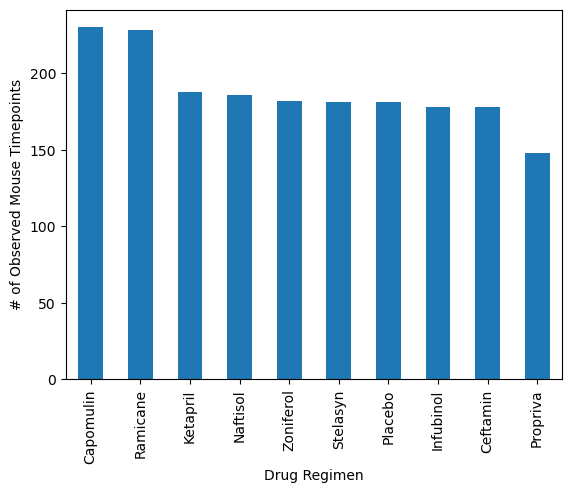

In [35]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count = clean_mouse_data['Drug Regimen'].value_counts()
count.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

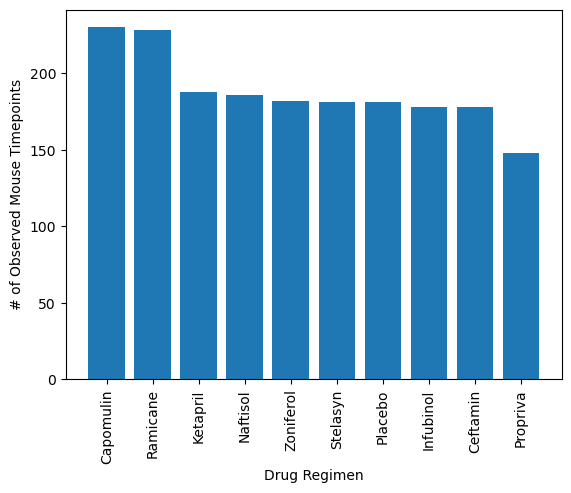

In [37]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
count_df = clean_mouse_data['Drug Regimen'].value_counts()

plt.bar(count.index, count)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

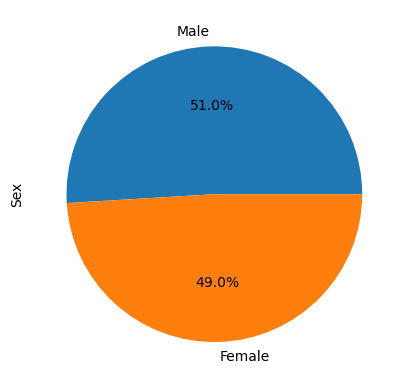

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
count = clean_mouse_data['Sex'].value_counts()
count.plot(kind="pie", autopct='%1.1f%%')
plt.show()

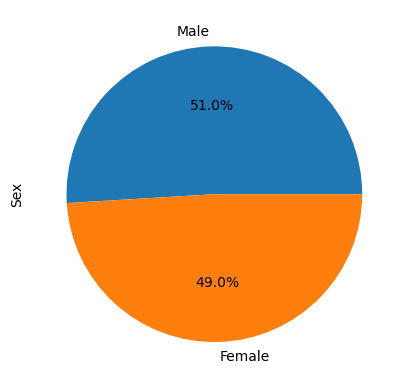

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count = clean_mouse_data['Sex'].value_counts()
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=0)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor = clean_mouse_data.groupby(["Mouse ID"])['Timepoint'].max()
final_tumor = final_tumor.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data_final_tumor = final_tumor.merge(clean_mouse_data, on=["Mouse ID", 'Timepoint'], how="left")

In [61]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data_final_tumor.loc[merged_data_final_tumor["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.50,.75])
    lower_quartile = quartiles[.25]
    upper_quartile = quartiles[.75]
    iqr = upper_quartile- lower_quartile
    lower_bound = lower_quartile - (1.5*iqr)
    upper_bound =  upper_quartile + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


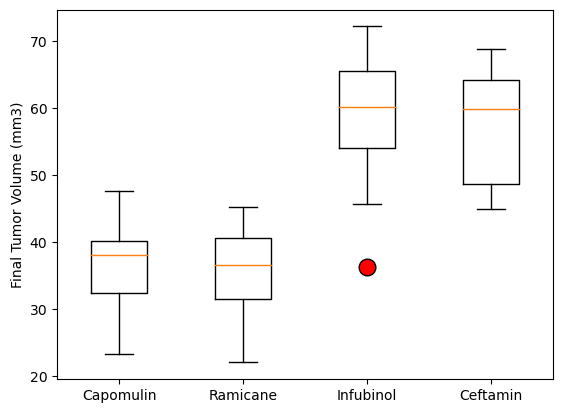

In [63]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

outlier_color = dict(markerfacecolor = 'red', markersize =12)

plt.boxplot(tumor_vol_data, labels=treatment_list, flierprops=outlier_color)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

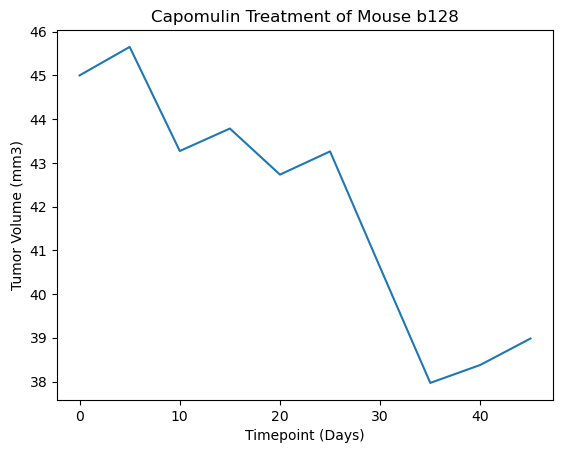

In [75]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter the data for Capomulin treatment
capomulin_data = clean_mouse_data[clean_mouse_data['Drug Regimen'] == 'Capomulin']

# Choose a specific mouse (replace 'b128' with the actual Mouse ID)
selected_mouse_id = 'b128'

# Filter the data for the selected mouse
selected_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == selected_mouse_id]


plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin Treatment of Mouse {selected_mouse_id}')
plt.show()

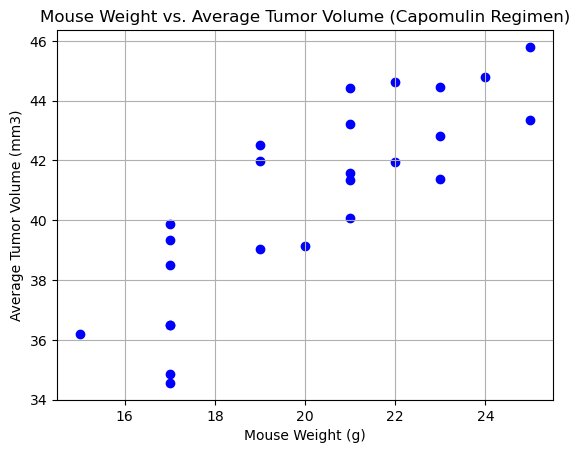

In [78]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
import matplotlib.pyplot as plt

# Filter the data for Capomulin treatment
capomulin_data = clean_mouse_data[clean_mouse_data['Drug Regimen'] == 'Capomulin']

# Group the data by 'Mouse ID' and calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Retrieve the weight of each mouse (assuming you use a specific time point, e.g., Timepoint = 0)
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

# Create a scatter plot
plt.scatter(mouse_weight, average_tumor_volume, marker='o', facecolors='b', edgecolors='b')


plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

plt.grid()
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


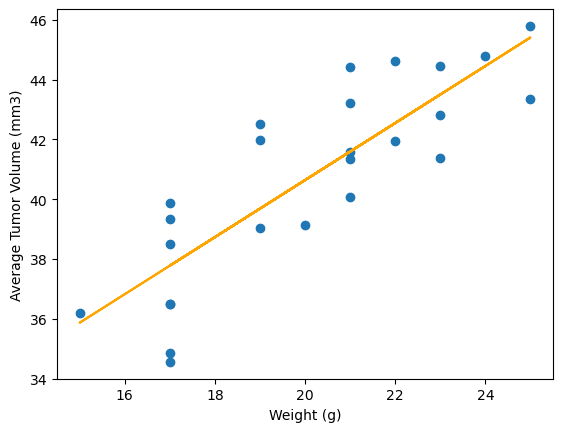

In [80]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

import matplotlib.pyplot as plt
import scipy.stats as st

capomulin_data = clean_mouse_data[clean_mouse_data['Drug Regimen'] == 'Capomulin']

capomulin_average = capomulin_data.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean()

corr = round(st.pearsonr(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])[0], 2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")

model = st.linregress(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])

y_values = capomulin_average['Weight (g)'] * model.slope + model.intercept

plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'], y_values, color="orange")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
